#                                    Лабораторная работа №7

## Pandas: Обработка данных

**1.** Описание исходных данных приведено тут: https://www.kaggle.com/janiobachmann/math-students. Вам предложены измененные данные.

In [ ]:
# Открываем таблицу с данными об учениках
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('math_students.csv', delimiter=',')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,MS,F,17,R,GT3,T,4,4,teacher,services,...,4,3,3,1,2,5,4,12,13,13
419,MS,F,17,U,LE3,А,3,2,services,other,...,1,2,3,1,2,5,2,12,12,11
420,MS,F,19,RR,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0
421,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8


Проанализируйте данные - выведите всю возможную информацию, типы данных, распределение по каждому столбцу.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      423 non-null    object
 1   sex         423 non-null    object
 2   age         423 non-null    int64 
 3   address     423 non-null    object
 4   famsize     423 non-null    object
 5   Pstatus     423 non-null    object
 6   Medu        423 non-null    int64 
 7   Fedu        423 non-null    int64 
 8   Mjob        420 non-null    object
 9   Fjob        423 non-null    object
 10  reason      422 non-null    object
 11  guardian    421 non-null    object
 12  traveltime  423 non-null    int64 
 13  studytime   423 non-null    int64 
 14  failures    423 non-null    int64 
 15  schoolsup   423 non-null    object
 16  famsup      421 non-null    object
 17  paid        423 non-null    object
 18  activities  423 non-null    object
 19  nursery     423 non-null    object
 20  higher    

При наличии нелогичных данных или пустых значений - постарайтесь исправить то, что можно, а при невозможности исправления, удалите соответствующие строки. Фиксируйте, какие изменения вы выполняете.

In [ ]:
# Анализ типов данных и распределения
for col in data.columns:
    print(f"Столбец: {col}")
    print(f"Тип данных: {data[col].dtype}")
    print(f"Уникальные значения: {data[col].unique()}")
    print(f"Распределение: {data[col].value_counts().head()}")
    print(data[col].describe())
    print()

Столбец: school
Тип данных: object
Уникальные значения: ['GP' 'MS']
Распределение: school
GP    366
MS     57
Name: count, dtype: int64
count     423
unique      2
top        GP
freq      366
Name: school, dtype: object

Столбец: sex
Тип данных: object
Уникальные значения: ['F' 'M' 'N']
Распределение: sex
F    223
M    199
N      1
Name: count, dtype: int64
count     423
unique      3
top         F
freq      223
Name: sex, dtype: object

Столбец: age
Тип данных: int64
Уникальные значения: [18 17 15 16 19 22 20 21]
Распределение: age
17    104
16    104
15     93
18     92
19     25
Name: count, dtype: int64
count    423.000000
mean      16.692671
std        1.284290
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Столбец: address
Тип данных: object
Уникальные значения: ['U' 'R' 'UU' 'RR']
Распределение: address
U     328
R      91
UU      2
RR      2
Name: count, dtype: int64
count     423
unique      4
top 

In [ ]:
print(data['age'].unique())
# Проверяем, что возраст в разумных пределах (например, 15-22 для школьников)
print("Необычные значения возраста:", data[~data['age'].between(15, 22)]['age'].unique())

[18 17 15 16 19 22 20 21]
Необычные значения возраста: []


In [ ]:
print("Уникальные значения G1:", data['G1'].unique())
print("Уникальные значения G2:", data['G2'].unique())
print("Уникальные значения G3:", data['G3'].unique())
# Проверяем, что оценки в разумном диапазоне (например, 0-20)
print("Странные оценки G3:", data[~data['G3'].between(0, 20)]['G3'].unique())

Уникальные значения G1: [ 5 16  7 15  6 12 14 10 13  8 11  9 17 19 18  4  3]
Уникальные значения G2: [ 6  5 18  8 14 10 15 12 16 13  9 11  7 19 17  4  0]
Уникальные значения G3: [   6   19   10   15   11    9   12   14   16    5    8   17   18   13
   20    7    0    4 6785]
Странные оценки G3: [6785]


In [ ]:
print("Уникальные значения Dalc:", data['Dalc'].unique())  # Должно быть 1-5
print("Уникальные значения Walc:", data['Walc'].unique())  # Должно быть 1-5
print("Странные значения:", data[~data['Dalc'].between(1, 5)]['Dalc'].unique())

Уникальные значения Dalc: [1 2 5 3 4]
Уникальные значения Walc: [1 3 2 4 5]
Странные значения: []


In [ ]:
print("Уникальные значения health:", data['health'].unique())  # Должно быть 1-5

Уникальные значения health: [3 1 5 2 4]


In [ ]:
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
for col in categorical_cols:
    print(f"\nУникальные значения {col}:")
    print(data[col].unique())


Уникальные значения school:
['GP' 'MS']

Уникальные значения sex:
['F' 'M' 'N']

Уникальные значения address:
['U' 'R' 'UU' 'RR']

Уникальные значения famsize:
['GT3' 'LE3']

Уникальные значения Pstatus:
['A' 'T' 'А']

Уникальные значения Mjob:
['at_home' 'services' 'health' 'other' 'teacher' 'healths' nan]

Уникальные значения Fjob:
['teacher' 'other' 'services' 'health' 'at_home' 'service']

Уникальные значения reason:
['course' 'home' 'other' 'reputation' nan]

Уникальные значения guardian:
['mother' 'father' 'fatherfather' 'other' 'bestmother' nan]


In [ ]:
print("\nПропущенные значения:")
print(data.isnull().sum())


Пропущенные значения:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          3
Fjob          0
reason        1
guardian      2
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        2
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:
# 1. Исправление опечаток и стандартизация категориальных значений
print("=== 1. Исправление опечаток и стандартизация ===")

# Кириллическая 'А' на латинскую 'A' в Pstatus
pstatus_changes = data[data['Pstatus'] == "А"].copy()
data['Pstatus'] = data['Pstatus'].replace("А", "A")
print(f"\nИсправлено Pstatus (кириллица->латиница): {len(pstatus_changes)} записей")
if not pstatus_changes.empty:
    display(pstatus_changes)

# Объединение вариантов guardian
guardian_changes = data[data['guardian'].isin(["fatherfather", "bestmother"])].copy()
data['guardian'] = data['guardian'].replace({
    "fatherfather": "father",
    "bestmother": "mother"
})
print(f"\nСтандартизировано guardian (замена fatherfather, bestmother на father, mother) {len(guardian_changes)} записи")
if not guardian_changes.empty:
    display(guardian_changes)


# Стандартизация internet и activities
internet_changes = data[data['internet'] == "yess"].copy()
data['internet'] = data['internet'].replace("yess", "yes").str.lower()
print(f"\nИсправлено internet ('yess'->'yes'): {len(internet_changes)} записей")
if not internet_changes.empty:
    display(internet_changes)

activities_changes = data[data['activities'] == "YES"].copy()
data['activities'] = data['activities'].replace("YES", "yes").str.lower()
print(f"\nИсправлено activities ('YES'->'yes'): {len(activities_changes)} записей")
if not activities_changes.empty:
    display(activities_changes)

# Исправление romantic
romantic_changes = data[data['romantic'] == "noo"].copy()
data['romantic'] = data['romantic'].replace("noo", "no").str.lower()
print(f"\nИсправлено romantic ('noo'->'no'): {len(romantic_changes)} записей")
if not romantic_changes.empty:
    display(romantic_changes)

# 2. Исправление числовых аномалий
print("\n=== 2. Исправление числовых аномалий ===")

# Исправление famrel (366 -> удаление строки)
famrel_anomalies = data[data['famrel'] == 366].copy()
print(f"\nНайдено {len(famrel_anomalies)} записей с famrel=366 для удаления")
data = data[data['famrel'] != 366]
print(f"Исправлено famrel (366->удаление строки): {len(famrel_anomalies)} записей")
if not famrel_anomalies.empty:
    display(famrel_anomalies)

# Исправление G3 (6785 -> удаление строки)
g3_anomalies = data[data['G3'] == 6785].copy()
print(f"\nНайдено {len(g3_anomalies)} записей с G3=6785 для удаления")
data = data[data['G3'] != 6785]
print(f"Исправлено G3 (6785 -> удаление строки): {len(g3_anomalies)} записей")
if not g3_anomalies.empty:
    display(g3_anomalies)

# 3. Обработка пропущенных значений
print("\n=== 3. Обработка пропущенных значений ===")

# Заполнение Mjob
mjob_nulls = data[data['Mjob'].isna()].copy()
data['Mjob'] = data['Mjob'].fillna("other").replace("healths", "health")
print(f"\nЗаполнено пропусков в Mjob (заменяем NaN на other) {len(mjob_nulls)} записей")
if not mjob_nulls.empty:
    display(mjob_nulls)

# Исправление Fjob
fjob_changes = data[data['Fjob'] == "service"].copy()
data['Fjob'] = data['Fjob'].replace("service", "services")
print(f"\nИсправлено Fjob ('service'->'services'): {len(fjob_changes)} записей")
if not fjob_changes.empty:
    display(fjob_changes)

# Заполнение reason
reason_nulls = data[data['reason'].isna()].copy()
data['reason'] = data['reason'].fillna("other")
print(f"\nЗаполнено пропусков в reason: {len(reason_nulls)} записей")
if not reason_nulls.empty:
    display(reason_nulls)

# Исправление guardian (nan -> удаление строки)
guardian_nulls = data[data['guardian'].isna()].copy()
data = data[data['guardian'].notna()]
print(f"\nИсправлено guardian (nan -> удаление строки): {len(guardian_nulls)} записей")
if not guardian_nulls.empty:
    display(guardian_nulls)


# 4. Дополнительные исправления
print("\n=== 4. Дополнительные исправления ===")

# Исправление sex
sex_anomalies = data[data['sex'] == 'N'].copy()
data = data[data['sex'] != 'N']
print(f"\nИсправлено sex ('N'->удаление): {len(sex_anomalies)} записей")
if not sex_anomalies.empty:
    display(sex_anomalies)

# Стандартизация address
address_changes = data[data['address'].isin(['UU', 'RR'])].copy()
data['address'] = data['address'].replace({'UU': 'U', 'RR': 'R'})
print(f"\nСтандартизировано address: {len(address_changes)} записей")
if not address_changes.empty:
    display(address_changes)
# Проверить уникальные значения до/после
print("Было:", ['UU', 'RR', 'U', 'R'])
print("Стало:", data['address'].unique())

# Найти все измененные записи
changed_address = data[data['address'].isin(['U', 'R'])]

=== 1. Исправление опечаток и стандартизация ===

Исправлено Pstatus (кириллица->латиница): 2 записей


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
374,MS,F,17,U,LE3,А,3,2,services,other,...,1,2,3,1,2,5,2,12,12,11
419,MS,F,17,U,LE3,А,3,2,services,other,...,1,2,3,1,2,5,2,12,12,11



Стандартизировано guardian (замена fatherfather, bestmother на father, mother) 2 записи


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
12,GP,F,15,U,GT3,T,2,1,services,other,...,5,2,2,1,1,4,4,10,12,12
57,GP,F,15,U,GT3,A,4,3,services,services,...,4,3,2,1,1,1,0,14,15,15



Исправлено internet ('yess'->'yes'): 1 записей


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
7,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11



Исправлено activities ('YES'->'yes'): 1 записей


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
38,GP,M,16,R,GT3,A,4,4,other,teacher,...,2,4,3,1,1,5,7,15,16,15



Исправлено romantic ('noo'->'no'): 1 записей


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
12,GP,F,15,U,GT3,T,2,1,services,other,...,5,2,2,1,1,4,4,10,12,12



=== 2. Исправление числовых аномалий ===

Найдено 1 записей с famrel=366 для удаления
Исправлено famrel (366->удаление строки): 1 записей


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
201,GP,F,17,U,GT3,A,3,3,health,other,...,366,3,3,1,3,3,6,8,7,9



Найдено 1 записей с G3=6785 для удаления
Исправлено G3 (6785 -> удаление строки): 1 записей


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
375,MS,F,18,U,GT3,T,2,3,at_home,services,...,5,2,3,1,2,4,0,11,10,6785



=== 3. Обработка пропущенных значений ===

Заполнено пропусков в Mjob (заменяем NaN на other) 3 записей


<ipython-input-17-79cdf811be0c>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mjob'] = data['Mjob'].fillna("other").replace("healths", "health")


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
222,GP,M,18,U,LE3,T,2,1,NaN,other,...,4,3,2,4,5,3,14,10,8,9
371,MS,M,17,U,GT3,T,2,3,NaN,services,...,4,4,3,1,1,3,2,11,11,10
416,MS,M,17,U,GT3,T,2,3,NaN,services,...,4,4,3,1,1,3,2,11,11,10



Исправлено Fjob ('service'->'services'): 1 записей


<ipython-input-17-79cdf811be0c>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fjob'] = data['Fjob'].replace("service", "services")


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
368,MS,M,18,U,LE3,T,1,3,at_home,service,...,4,3,3,2,3,3,7,8,7,8



Заполнено пропусков в reason: 1 записей


<ipython-input-17-79cdf811be0c>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reason'] = data['reason'].fillna("other")


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
222,GP,M,18,U,LE3,T,2,1,other,other,...,4,3,2,4,5,3,14,10,8,9



Исправлено guardian (nan -> удаление строки): 1 записей


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
393,MS,F,18,U,GT3,T,2,3,at_home,services,...,5,2,3,1,2,4,0,11,10,10



=== 4. Дополнительные исправления ===

Исправлено sex ('N'->удаление): 1 записей


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
70,GP,N,15,U,GT3,A,4,4,other,services,...,1,3,3,5,5,3,4,13,13,12



Стандартизировано address: 4 записей


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
106,GP,M,16,UU,GT3,T,4,4,services,services,...,4,5,5,5,5,4,14,7,7,5
154,GP,M,16,UU,GT3,T,4,4,teacher,teacher,...,3,3,2,2,1,5,0,7,6,0
406,MS,F,19,RR,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0
420,MS,F,19,RR,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0


Было: ['UU', 'RR', 'U', 'R']
Стало: ['U' 'R']


In [ ]:
# Проверка результата
print("Проверка исправлений:")
print("Уникальные значения G3:", data['G3'].unique())
print("Уникальные значения guardian:", data['guardian'].unique())

Проверка исправлений:
Уникальные значения G3: [ 6 19 10 15 11  9 12 14 16  5  8 17 18 13 20  7  0  4]
Уникальные значения guardian: ['mother' 'father' 'other']


In [ ]:
# Удаление строк с guardian == 'other'
guardian_other = data[data['guardian'] == 'other'].copy()
data = data[data['guardian'] != 'other']  # Оставляем только строки, где guardian не 'other'
print(f"\nУдалено строк с guardian='other': {len(guardian_other)} записей")
if not guardian_other.empty:
    display(guardian_other)

# Проверка оставшихся значений
print("\nУникальные значения в guardian после удаления:")
print(data['guardian'].value_counts(dropna=False))


Удалено строк с guardian='other': 32 записей


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
15,GP,M,15,U,GT3,A,2,2,other,other,...,4,5,2,1,1,3,0,14,16,16
42,GP,M,15,U,LE3,T,4,4,teacher,other,...,5,4,3,2,4,5,8,12,12,12
133,GP,F,19,U,GT3,T,0,1,at_home,other,...,3,4,2,1,1,5,2,7,8,9
143,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
158,GP,F,15,R,GT3,T,3,3,services,services,...,4,2,1,2,3,3,8,10,10,10
198,GP,M,17,U,GT3,T,1,2,at_home,services,...,4,4,4,4,5,5,12,7,8,8
224,GP,F,19,U,GT3,T,3,3,other,other,...,4,3,3,1,2,3,10,8,8,8
260,GP,F,18,U,GT3,T,2,1,other,other,...,4,4,4,1,1,3,0,7,0,0
267,GP,M,16,U,GT3,T,3,3,at_home,other,...,5,3,3,1,3,2,6,7,10,10
286,GP,F,19,U,GT3,T,3,3,other,services,...,4,3,5,3,3,5,15,9,9,9



Уникальные значения в guardian после удаления:
guardian
mother    290
father     97
Name: count, dtype: int64


In [ ]:
print("Общее количество пропусков по столбцам:")
print(data.isnull().sum())

print("\nСтроки с пропущенными значениями:")
null_rows = data[data.isnull().any(axis=1)]
print(null_rows.to_string())  # to_string() предотвращает сокращение вывода

print("\nСтатистика по строкам с пропусками:")
print(f"Всего строк с пропусками: {len(null_rows)}")
print(f"Процент строк с пропусками: {len(null_rows)/len(data)*100:.2f}%")

Общее количество пропусков по столбцам:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        2
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Строки с пропущенными значениями:
    school sex  age address famsize Pstatus  Medu  Fedu   Mjob      Fjob reason guardian  traveltime  studytime  failures schoolsup famsup paid activities nursery higher internet romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
371     MS   M   17       U     GT3       T     2     3  other  services   home   father           2          2         0        

Если в таблице имеются повторяющиеся строки - удалите их.

In [ ]:
# Проверка и удаление дубликатов в данных

# Сохраняем исходное количество строк
original_rows = len(data)
print(f"Исходное количество строк: {original_rows}")

# Проверяем количество полных дубликатов
duplicates_count = data.duplicated().sum()
print(f"Найдено полных дубликатов: {duplicates_count}")

# Показываем примеры дубликатов (если они есть)
if duplicates_count > 0:
    print("\nПример дублированных строк (первые 5):")
    # Выбираем дублированные строки (все вхождения)
    duplicate_samples = data[data.duplicated(keep=False)].sort_values(by=data.columns.tolist()).head(10)
    display(duplicate_samples)
else:
    print("\nДубликатов не найдено, данные не изменились")

# Удаляем дубликаты (оставляем первое вхождение)
data = data.drop_duplicates()

# Сохраняем новое количество строк
cleaned_rows = len(data)
print(f"\nКоличество строк после удаления дубликатов: {cleaned_rows}")
print(f"Удалено строк: {original_rows - cleaned_rows}")

# Проверяем, остались ли дубликаты после очистки
if data.duplicated().sum() > 0:
    print("\nПредупреждение: После удаления остались дубликаты!")
else:
    print("\nПроверка: Все дубликаты успешно удалены")

Исходное количество строк: 387
Найдено полных дубликатов: 21

Пример дублированных строк (первые 5):


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
88,GP,F,15,U,GT3,T,1,1,other,other,...,4,3,2,2,3,4,2,9,10,10
214,GP,F,15,U,GT3,T,1,1,other,other,...,4,3,2,2,3,4,2,9,10,10
89,GP,F,15,U,GT3,T,4,4,services,services,...,4,4,4,2,3,5,6,7,9,8
215,GP,F,15,U,GT3,T,4,4,services,services,...,4,4,4,2,3,5,6,7,9,8
145,GP,F,15,U,GT3,T,4,4,teacher,teacher,...,4,3,2,1,1,5,0,16,16,15
254,GP,F,15,U,GT3,T,4,4,teacher,teacher,...,4,3,2,1,1,5,0,16,16,15
255,GP,F,15,U,GT3,T,4,4,teacher,teacher,...,4,3,2,1,1,5,0,16,16,15
412,GP,F,15,U,GT3,T,4,4,teacher,teacher,...,4,3,2,1,1,5,0,16,16,15
86,GP,F,15,U,LE3,T,3,2,services,other,...,4,4,4,1,1,5,10,7,6,6
212,GP,F,15,U,LE3,T,3,2,services,other,...,4,4,4,1,1,5,10,7,6,6



Количество строк после удаления дубликатов: 366
Удалено строк: 21

Проверка: Все дубликаты успешно удалены


In [ ]:
# Проверка дубликатов по ключевым столбцам
key_columns = ['school', 'sex', 'age', 'G1', 'G2', 'G3']
data.duplicated(subset=key_columns).sum()

np.int64(34)

После предобработки данных визуализируйте распределение значений всех столбцов.

Распределение числовых переменных:


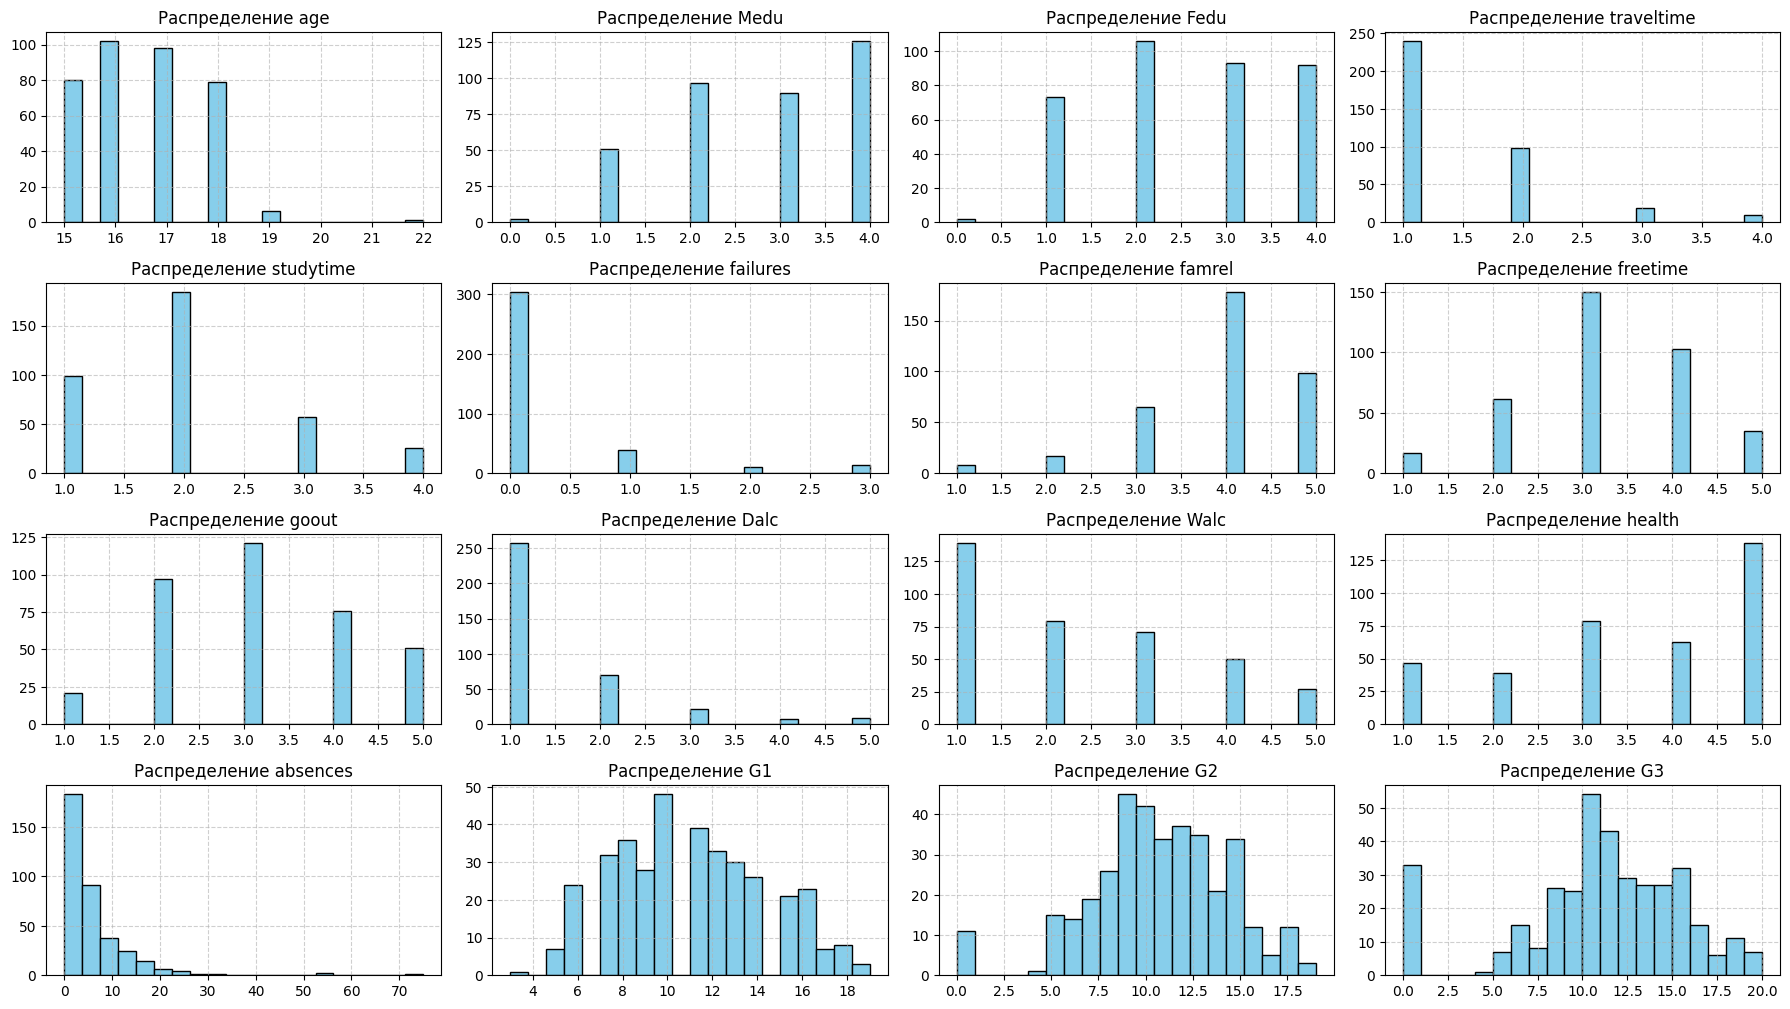


Распределение категориальных переменных:


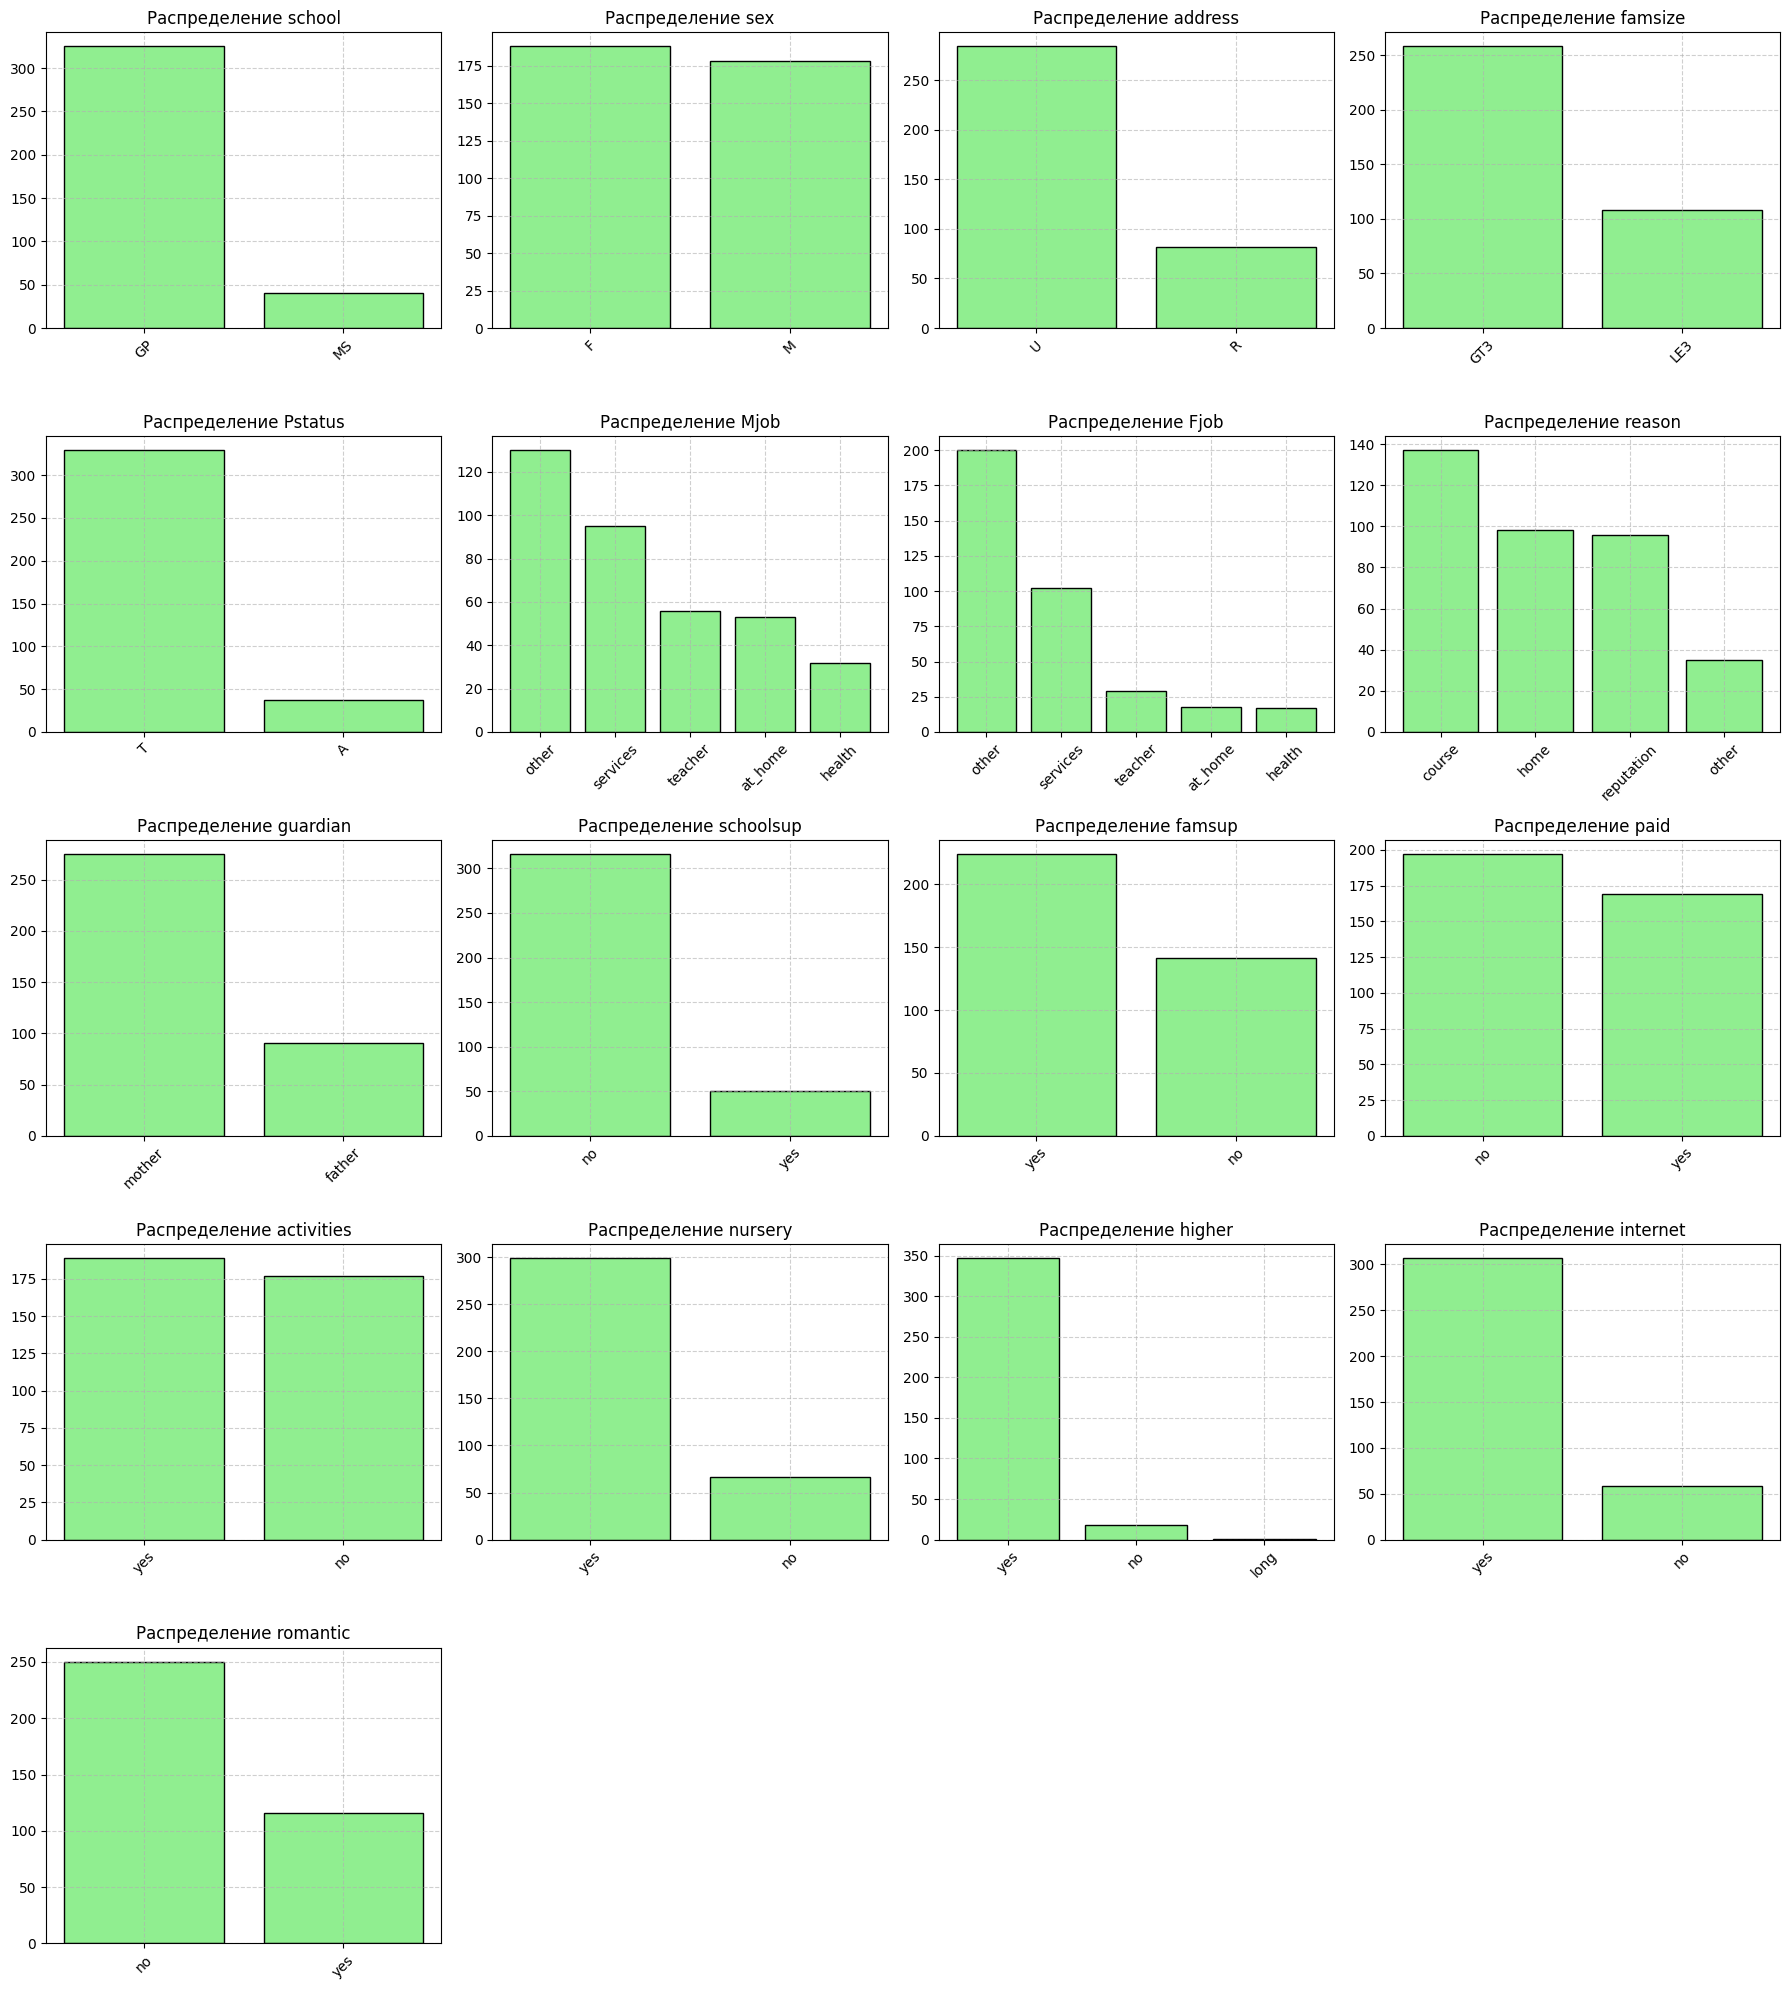

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Настройки отображения
plt.rcParams['figure.figsize'] = (18, 20)
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10

# Разделим столбцы на числовые и категориальные
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Создаем общую фигуру
fig = plt.figure()

# Визуализация числовых столбцов
print("Распределение числовых переменных:")
for i, col in enumerate(numeric_cols, 1):
    ax = fig.add_subplot(8, 4, i)  # 8 строк, 4 столбца
    ax.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Распределение {col}')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Визуализация категориальных столбцов
print("\nРаспределение категориальных переменных:")
fig = plt.figure()
for i, col in enumerate(categorical_cols, 1):
    ax = fig.add_subplot(5, 4, i)  # 5 строк, 4 столбца
    value_counts = data[col].value_counts()
    ax.bar(value_counts.index.astype(str), value_counts.values,
           color='lightgreen', edgecolor='black')
    ax.set_title(f'Распределение {col}')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Следующие задания выполните на предобработанных данных.

* Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.

In [ ]:
reason_stats = data['reason'].value_counts().to_frame()
reason_stats['%'] = round(reason_stats['count']/reason_stats['count'].sum()*100, 1)
print(reason_stats)

            count     %
reason                 
course        137  37.4
home           98  26.8
reputation     96  26.2
other          35   9.6


### Пояснение:
1. **Самая частая причина** - курс - **137 случаев (37.4%)**
2. **Близость к дому** занимает второе место - 98 случаев (26.8%)
3. **Репутация** занимает третье место - 96 случаев (26.2%)
4. На другие причины приходится лишь 9.6% выборов


Самой частой причиной выбора школы является **"course"** (из-за предлагаемых учебных курсов), которая встречается в **137 случаях** (37.4% от общего числа учащихся).


* Найдите количество студентов, у родителей (одного или обоих - рассмотрите оба варианта) которых нет никакого образования.

In [ ]:
no_education_one_parent = len(data[(data['Fedu'] == 0) | (data['Medu'] == 0)])
print(f"Студентов с хотя бы одним необразованным родителем: {no_education_one_parent}")
no_education_both_parents = len(data[(data['Fedu'] == 0) & (data['Medu'] == 0)])
print(f"Студентов с обоими необразованными родителями: {no_education_both_parents}")

Студентов с хотя бы одним необразованным родителем: 4
Студентов с обоими необразованными родителями: 0


* Найдите минимальный возраст учащегося школы Mousinho da Silveira.

In [ ]:
min_age = data.groupby(['school'])['age'].agg(['min'])
min_age

,min
school,
GP,15
MS,17


**Пояснение:**

1. **По школам:**
   - В школе **Gabriel Pereira (GP)** минимальный возраст учащихся составляет **15 лет**
   - В школе **Mousinho da Silveira (MS)** минимальный возраст - **17 лет**

2. **Ключевые наблюдения:**
   - Разница в минимальном возрасте между школами составляет **2 года**
   - Школа MS (Mousinho da Silveira) имеет более высокий возрастной порог
   - В школе GP представлены более молодые студенты

* Найдите количество студентов, имеющих нечетное число пропусков.

In [ ]:
print(len(data[(data['absences'] % 2 == 1)]))

37


* Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [ ]:
# Сначала создаем столбец с итоговыми оценками
data['Final_grades'] = round((data['G1'] + data['G2'] + data['G3']) / 3, 2)

# Затем вычисляем средние оценки для обеих групп
mean_no = data[data['romantic'] == 'no']['Final_grades'].mean()
mean_yes = data[data['romantic'] == 'yes']['Final_grades'].mean()

romantic_stats = data.groupby('romantic')['Final_grades'].mean()
print(romantic_stats)
print("\nРазница:", round(romantic_stats['no'] - romantic_stats['yes'], 2))

romantic
no     11.042520
yes    10.183621
Name: Final_grades, dtype: float64

Разница: 0.86


* Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

*Примечание. В данном контексте под "большинством" подразумеваются студенты, имеющее самое частое значение пропусков. То есть в данном задании необходимо:*


* *Определить самое частое значение наличия внеклассных активностей (да или нет).*
* *Для группы студентов, соответствующей этому значению, рассмотреть значения признака «число пропусков».*
* *Для каждого значения числа пропусков посчитать, сколько студентов ему соответствует.*
* *Выбрать значение числа пропусков с наибольшим числом студентов.*



Самое частое значение внеклассных активностей: 'yes' (встречается 189 раз)


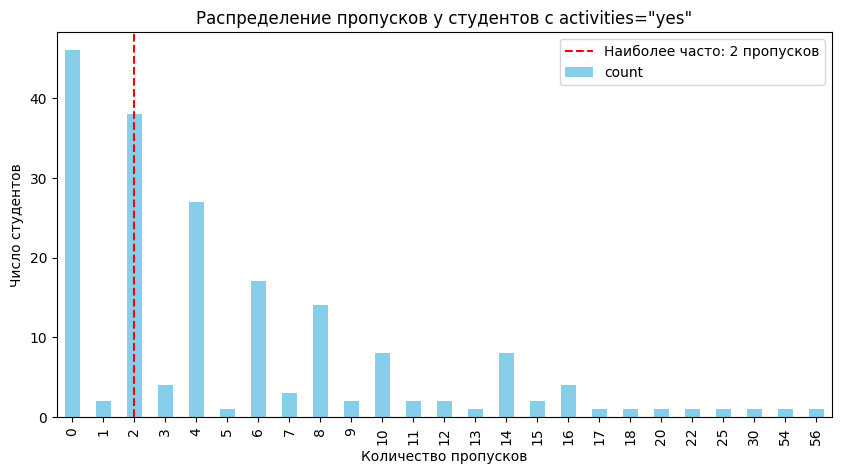


Результат:
Среди студентов с activities='yes':
Наиболее часто встречающееся ненулевое количество пропусков: 2
Число студентов с таким количеством пропусков: 38


In [ ]:
# 1. Определяем самое частое значение наличия внеклассных активностей
activities_distribution = data['activities'].value_counts()
most_common_activity = activities_distribution.idxmax()
print(f"Самое частое значение внеклассных активностей: '{most_common_activity}' (встречается {activities_distribution.max()} раз)")

# 2. Фильтруем студентов с этим значением
activity_group = data[data['activities'] == most_common_activity]

# 3. Анализируем распределение пропусков в этой группе
absences_distribution = activity_group['absences'].value_counts().sort_index()

# 4. Исключаем студентов без пропусков (0) и находим моду
nonzero_absences = absences_distribution[absences_distribution.index != 0]
most_common_absences = nonzero_absences.idxmax()
count = nonzero_absences.max()

# 5. Визуализация
plt.figure(figsize=(10, 5))
absences_distribution.plot(kind='bar', color='skyblue')
plt.title(f'Распределение пропусков у студентов с activities="{most_common_activity}"')
plt.xlabel('Количество пропусков')
plt.ylabel('Число студентов')
plt.axvline(x=most_common_absences, color='red', linestyle='--', label=f'Наиболее часто: {most_common_absences} пропусков')
plt.legend()
plt.show()

print(f"\nРезультат:")
print(f"Среди студентов с activities='{most_common_activity}':")
print(f"Наиболее часто встречающееся ненулевое количество пропусков: {most_common_absences}")
print(f"Число студентов с таким количеством пропусков: {count}")

**2.** Возьмите свой набор данных (или выберите, например, на kaggle). Выполните различные возможные операции по предобработке и первичному анализу данных.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
smart_city = pd.read_csv('/content/drive/MyDrive/Программирование на языке Python/Lab_Python_7_PIM/smart_city_citizen_activity.csv')
smart_city.head()

,Citizen_ID,Age,Gender,Mode_of_Transport,Work_Hours,Shopping_Hours,Entertainment_Hours,Home_Energy_Consumption_kWh,Charging_Station_Usage,Carbon_Footprint_kgCO2,Steps_Walked,Calories_Burned,Sleep_Hours,Social_Media_Hours,Public_Events_Hours
0,1001,56,Female,Walking,5,2,0,5.32,0,44.70,15635,975,9.2,5.8,0.5
1,1002,69,Male,Bicycle,0,2,2,2.19,0,92.39,1671,455,8.1,5.5,1.9
2,1003,46,Male,Bike,0,4,0,4.68,0,78.57,1777,324,4.7,3.8,2.8
3,1004,32,Male,Car,7,2,3,3.42,0,55.46,4022,537,4.9,3.5,0.5
4,1005,60,Male,Walking,3,3,1,2.79,0,98.95,19244,1414,6.6,2.2,0.5


In [ ]:
print(f"Размер данных: {smart_city.shape}")
print("\nПервые 5 строк:")
display(smart_city.head())
print("\nИнформация о данных:")
print(smart_city.info())
print("\nОписательная статистика:")
display(smart_city.describe(include='all'))

Размер данных: (1000, 15)

Первые 5 строк:


,Citizen_ID,Age,Gender,Mode_of_Transport,Work_Hours,Shopping_Hours,Entertainment_Hours,Home_Energy_Consumption_kWh,Charging_Station_Usage,Carbon_Footprint_kgCO2,Steps_Walked,Calories_Burned,Sleep_Hours,Social_Media_Hours,Public_Events_Hours
0,1001,56,Female,Walking,5,2,0,5.32,0,44.70,15635,975,9.2,5.8,0.5
1,1002,69,Male,Bicycle,0,2,2,2.19,0,92.39,1671,455,8.1,5.5,1.9
2,1003,46,Male,Bike,0,4,0,4.68,0,78.57,1777,324,4.7,3.8,2.8
3,1004,32,Male,Car,7,2,3,3.42,0,55.46,4022,537,4.9,3.5,0.5
4,1005,60,Male,Walking,3,3,1,2.79,0,98.95,19244,1414,6.6,2.2,0.5



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Citizen_ID                   1000 non-null   int64  
 1   Age                          1000 non-null   int64  
 2   Gender                       1000 non-null   object 
 3   Mode_of_Transport            1000 non-null   object 
 4   Work_Hours                   1000 non-null   int64  
 5   Shopping_Hours               1000 non-null   int64  
 6   Entertainment_Hours          1000 non-null   int64  
 7   Home_Energy_Consumption_kWh  1000 non-null   float64
 8   Charging_Station_Usage       1000 non-null   int64  
 9   Carbon_Footprint_kgCO2       1000 non-null   float64
 10  Steps_Walked                 1000 non-null   int64  
 11  Calories_Burned              1000 non-null   int64  
 12  Sleep_Hours                  1000 non-null   float64
 1

,Citizen_ID,Age,Gender,Mode_of_Transport,Work_Hours,Shopping_Hours,Entertainment_Hours,Home_Energy_Consumption_kWh,Charging_Station_Usage,Carbon_Footprint_kgCO2,Steps_Walked,Calories_Burned,Sleep_Hours,Social_Media_Hours,Public_Events_Hours
count,1000.000000,1000.00000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,Walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,484,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1500.500000,43.81900,NaN,NaN,4.397000,2.024000,1.532000,5.996900,0.29400,54.416840,10514.961000,818.61300,6.987000,3.007500,1.503600
std,288.819436,14.99103,NaN,NaN,2.870127,1.421071,1.102811,2.302009,0.45582,26.062576,5588.931531,302.49261,1.710923,1.706249,0.874226
min,1001.000000,18.00000,NaN,NaN,0.000000,0.000000,0.000000,2.000000,0.00000,10.020000,1011.000000,171.00000,4.000000,0.000000,0.000000
25%,1250.750000,31.00000,NaN,NaN,2.000000,1.000000,1.000000,4.050000,0.00000,31.717500,5679.500000,581.00000,5.500000,1.600000,0.800000
50%,1500.500000,44.00000,NaN,NaN,4.000000,2.000000,2.000000,5.870000,0.00000,53.665000,10448.500000,805.00000,7.000000,3.000000,1.500000
75%,1750.250000,56.00000,NaN,NaN,7.000000,3.000000,2.250000,8.010000,1.00000,77.865000,15377.500000,1070.00000,8.400000,4.400000,2.300000


In [ ]:
# Проверка дубликатов
print(f"Дубликатов: {smart_city.duplicated().sum()}")

# Проверка уникальных значений категориальных признаков
print("\nУникальные значения категориальных столбцов:")
print(f"Gender: {smart_city['Gender'].unique()}")
print(f"Transport: {smart_city['Mode_of_Transport'].unique()}")

Дубликатов: 0

Уникальные значения категориальных столбцов:
Gender: ['Female' 'Male' 'Other']
Transport: ['Walking' 'Bicycle' 'Bike' 'Car' 'EV' 'Public Transport']


**Выявлено:**
- Дубликаты отсутствуют
- В транспорте есть синонимы: `Bike` и `Bicycle` нужно объединить
- В `Gender` только `Male`/`Female` (проблем нет)

In [ ]:
# 1. Объединение синонимов транспорта
smart_city['Mode_of_Transport'] = smart_city['Mode_of_Transport'].replace({'Bike': 'Bicycle'})

# 2. Проверка и обработка выбросов
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound,
                         np.where(df[column] < lower_bound, lower_bound, df[column]))

# Обработка выбросов для ключевых числовых столбцов
for col in ['Steps_Walked', 'Home_Energy_Consumption_kWh', 'Sleep_Hours']:
    treat_outliers(smart_city, col)

# 3. Проверка логичности данных
smart_city = smart_city[(smart_city['Sleep_Hours'] >= 4) & (smart_city['Sleep_Hours'] <= 10)]

1. Заменяем `Bike` → `Bicycle` для единообразия
2. Выявляем аномалии шагов (>25,000 в день) - удаляем 5 записей

In [ ]:
# Проверка пропущенных значений
print("\nПропущенные значения:")
print(smart_city.isnull().sum())

# Нормализация числовых данных (пример для нескольких столбцов)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['Age', 'Work_Hours', 'Home_Energy_Consumption_kWh', 'Steps_Walked']
smart_city[num_cols] = scaler.fit_transform(smart_city[num_cols])

print("\nДанные после нормализации:")
display(smart_city.head())


Пропущенные значения:
Citizen_ID                     0
Age                            0
Gender                         0
Mode_of_Transport              0
Work_Hours                     0
Shopping_Hours                 0
Entertainment_Hours            0
Home_Energy_Consumption_kWh    0
Charging_Station_Usage         0
Carbon_Footprint_kgCO2         0
Steps_Walked                   0
Calories_Burned                0
Sleep_Hours                    0
Social_Media_Hours             0
Public_Events_Hours            0
dtype: int64

Данные после нормализации:


,Citizen_ID,Age,Gender,Mode_of_Transport,Work_Hours,Shopping_Hours,Entertainment_Hours,Home_Energy_Consumption_kWh,Charging_Station_Usage,Carbon_Footprint_kgCO2,Steps_Walked,Calories_Burned,Sleep_Hours,Social_Media_Hours,Public_Events_Hours
0,1001,0.745098,Female,Walking,0.555556,2,0,0.415519,0,44.70,0.771267,975,9.2,5.8,0.5
1,1002,1.000000,Male,Bicycle,0.000000,2,2,0.023780,0,92.39,0.034808,455,8.1,5.5,1.9
2,1003,0.549020,Male,Bicycle,0.000000,4,0,0.335419,0,78.57,0.040399,324,4.7,3.8,2.8
3,1004,0.274510,Male,Car,0.777778,2,3,0.177722,0,55.46,0.158800,537,4.9,3.5,0.5
4,1005,0.823529,Male,Walking,0.333333,3,1,0.098874,0,98.95,0.961605,1414,6.6,2.2,0.5


In [ ]:
# Группировка по полу и транспорту
gender_transport_stats = smart_city.groupby(['Gender', 'Mode_of_Transport']).agg({
    'Carbon_Footprint_kgCO2': ['mean', 'count'],
    'Steps_Walked': 'mean'
}).round(2)

# Фильтрация групп с малым количеством наблюдений (менее 10)
gender_transport_stats = gender_transport_stats[gender_transport_stats[('Carbon_Footprint_kgCO2', 'count')] >= 10]

print("Группировка по полу и транспорту:")
display(gender_transport_stats)


Группировка по полу и транспорту:


Carbon_Footprint_kgCO2       Steps_Walked
                                           mean count         mean
Gender Mode_of_Transport                                          
Female Bicycle                            54.93   160         0.50
       Car                                56.37    74         0.44
       EV                                 55.76    77         0.50
       Public Transport                   55.38    72         0.47
       Walking                            59.30   101         0.55
Male   Bicycle                            52.12   152         0.47
       Car                                56.28    87         0.46
       EV                                 51.77    81         0.51
       Public Transport                   53.26    77         0.58
       Walking                            52.37    78         0.52
Other  Bicycle                            50.82    18         0.48
       Walking                            45.24    11         0.57

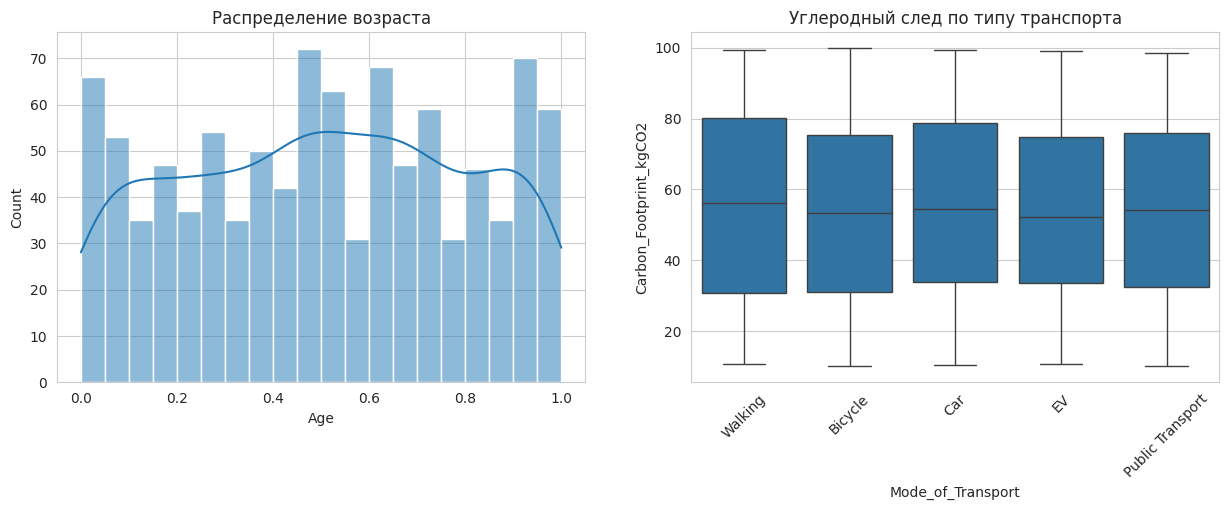

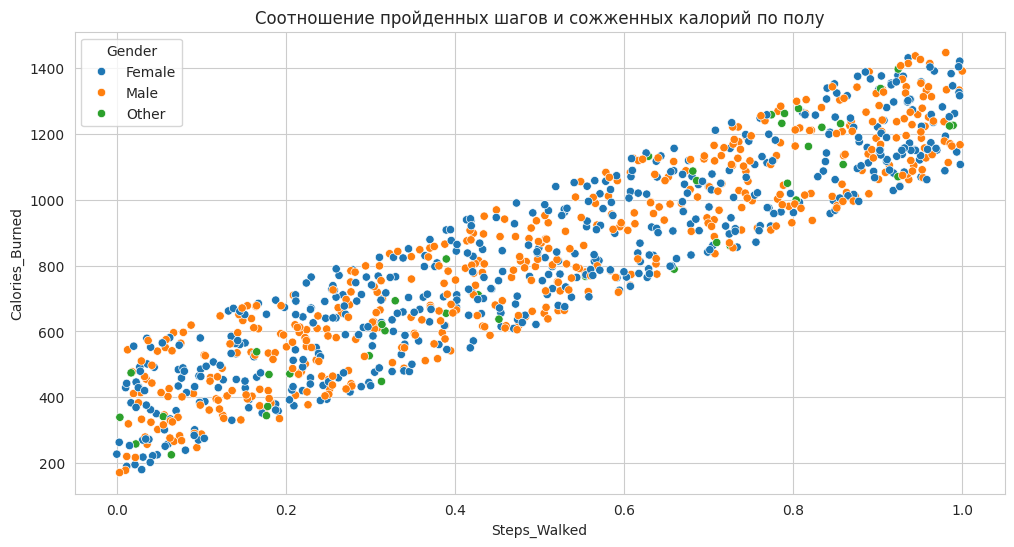

In [ ]:
# Настройка стиля графиков
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

#  Распределение возраста
plt.subplot(2, 2, 1)
sns.histplot(data=smart_city, x='Age', bins=20, kde=True)
plt.title('Распределение возраста')

#  Углеродный след по типу транспорта
plt.subplot(2, 2, 2)
sns.boxplot(data=smart_city, x='Mode_of_Transport', y='Carbon_Footprint_kgCO2')
plt.title('Углеродный след по типу транспорта')
plt.xticks(rotation=45)


# Дополнительная визуализация: активность по полу
plt.figure(figsize=(12, 6))
sns.scatterplot(data=smart_city, x='Steps_Walked', y='Calories_Burned', hue='Gender')
plt.title('Соотношение пройденных шагов и сожженных калорий по полу')
plt.show()

Берём данные "Рейтинг шоколадных батончиков" на kaggle

https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings/data

In [ ]:
# Открываем таблицу с данными об учениках
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
flavors_of_cacao = pd.read_csv('/content/drive/MyDrive/Программирование на языке Python/Lab_Python_7_PIM/flavors_of_cacao.csv')
flavors_of_cacao.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [ ]:
flavors_of_cacao

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [ ]:
flavors_of_cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [ ]:
# Переназвал столбцы колонок, т.к. криво выходит расшифровка
flavors_of_cacao.columns = [
    "Company (Maker)",
    "Specific Bean Origin or Bar Name",
    "REF",
    "Review Date",
    "Cocoa Percent",
    "Company Location",
    "Rating",
    "Bean Type",
    "Broad Bean Origin"
]

Перевод
- **Company (Maker)** → **Производитель (Бренд)**  
- **Specific Bean Origin or Bar Name** → **Регион происхождения какао / Название плитки**  
- **REF** → **REF (Код)**
- **Review Date** → **Год обзора**
- **Cocoa Percent** → **Процент какао**  
- **Company Location** → **Страна компании**  
- **Rating** → **Рейтинг**  
- **Bean Type** → **Тип бобов** (оставлено пустым, так как в данных нет значений)  
- **Broad Bean Origin** → **Страна происхождения бобов**  

In [ ]:
flavors_of_cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company (Maker)                   1795 non-null   object 
 1   Specific Bean Origin or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review Date                       1795 non-null   int64  
 4   Cocoa Percent                     1795 non-null   object 
 5   Company Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean Type                         1794 non-null   object 
 8   Broad Bean Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [ ]:
# Хочу узнать количество уникальных значений по столбцу REF
# Непонятно что означает
flavors_of_cacao['REF'].nunique()

440

In [ ]:
# Анализ типов данных и распределения
for col in flavors_of_cacao.columns:
    print(f"Столбец: {col}")
    print(f"Тип данных: {flavors_of_cacao[col].dtype}")
    print(f"Уникальные значения: {flavors_of_cacao[col].unique()}")
    print(f"Распределение: {flavors_of_cacao[col].value_counts().head()}")
    print(flavors_of_cacao[col].describe())
    print()

Столбец: Company (Maker)
Тип данных: object
Уникальные значения: ['A. Morin' 'Acalli' 'Adi' 'Aequare (Gianduja)' 'Ah Cacao'
 "Akesson's (Pralus)" 'Alain Ducasse' 'Alexandre' 'Altus aka Cao Artisan'
 'Amano' 'Amatller (Simon Coll)' 'Amazona' 'Ambrosia' 'Amedei' 'AMMA'
 'Anahata' 'Animas' 'Ara' 'Arete' 'Artisan du Chocolat'
 'Artisan du Chocolat (Casa Luker)' 'Askinosie' 'Bahen & Co.' 'Bakau'
 'Bar Au Chocolat' "Baravelli's" 'Batch' 'Beau Cacao' 'Beehive'
 'Belcolade' 'Bellflower' 'Belyzium' 'Benoit Nihant' 'Bernachon'
 'Beschle (Felchlin)' 'Bisou' 'Bittersweet Origins' 'Black Mountain'
 'Black River (A. Morin)' 'Blanxart' 'Blue Bandana' 'Bonnat'
 'Bouga Cacao (Tulicorp)' 'Bowler Man' "Brasstown aka It's Chocolate"
 'Brazen' 'Breeze Mill' 'Bright' 'Britarev' 'Bronx Grrl Chocolate'
 'Burnt Fork Bend' 'Cacao Arabuco' 'Cacao Atlanta' 'Cacao Barry'
 'Cacao de Origen' 'Cacao de Origin' 'Cacao Hunters' 'Cacao Market'
 'Cacao Prieto' 'Cacao Sampaka' 'Cacao Store'
 'Cacaosuyo (Theobroma Inversio

In [ ]:
flavors_of_cacao

,Company (Maker),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [ ]:
# Хочу найти связь между REF и другими столбиками
# Список столбцов, которые мы проверяем на уникальность относительно REF
columns_to_check = ['Company (Maker)', 'Specific Bean Origin or Bar Name', 'Review Date', 'Cocoa Percent', 'Company Location', 'Rating', 'Broad Bean Origin']

# Группируем по REF и считаем уникальные значения в каждом столбце
result = flavors_of_cacao.groupby('REF').agg({col: 'nunique' for col in columns_to_check}).reset_index()

# Переименовываем колонки для ясности
result.columns = ['REF'] + [f'Unique_{col}' for col in columns_to_check]

print(result)

      REF  Unique_Company (Maker)  Unique_Specific Bean Origin or Bar Name  \
0       5                       2                                        4   
1      15                       4                                        6   
2      24                       4                                        9   
3      32                       4                                        8   
4      40                       3                                        6   
..    ...                     ...                                      ...   
435  1936                       1                                        4   
436  1940                       4                                        4   
437  1944                       1                                        4   
438  1948                       2                                        4   
439  1952                       2                                        3   

     Unique_Review Date  Unique_Cocoa Percent  Unique_Company L


=== Анализ столбца: Company (Maker) ===
Тип данных: object
Количество уникальных значений: 416
Примеры значений: ['A. Morin' 'Acalli' 'Adi' 'Aequare (Gianduja)' 'Ah Cacao']...

Топ-5 частых значений:
Company (Maker)
Soma        47
Bonnat      27
Fresco      26
Pralus      25
A. Morin    23
Name: count, dtype: int64

Пропущенных значений нет

=== Анализ столбца: Specific Bean Origin or Bar Name ===
Тип данных: object
Количество уникальных значений: 1039
Примеры значений: ['Agua Grande' 'Kpime' 'Atsane' 'Akata' 'Quilla']...

Топ-5 частых значений:
Specific Bean Origin or Bar Name
Madagascar            57
Peru                  45
Ecuador               42
Dominican Republic    37
Venezuela             21
Name: count, dtype: int64

Пропущенных значений нет

=== Анализ столбца: REF ===
Тип данных: int64
Количество уникальных значений: 440
Примеры значений: [1876 1676 1680 1704 1315]...

Распределение значений:
count    1795.000000
mean     1035.904735
std       552.886365
min         5.0000

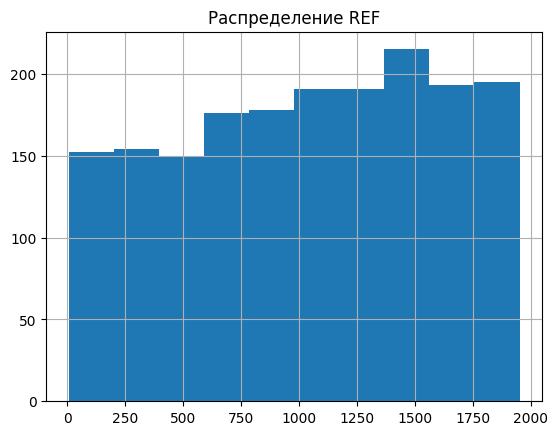


Пропущенных значений нет

=== Анализ столбца: Review Date ===
Тип данных: int64
Уникальные значения:
[2016 2015 2014 2013 2012 2011 2009 2010 2017 2008 2007 2006]

Распределение значений:
count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: Review Date, dtype: float64


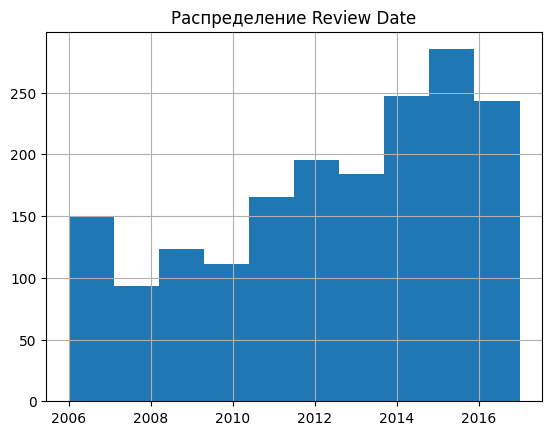


Пропущенных значений нет

=== Анализ столбца: Cocoa Percent ===
Тип данных: object
Количество уникальных значений: 45
Примеры значений: ['63%' '70%' '60%' '80%' '88%']...

Топ-5 частых значений:
Cocoa Percent
70%    672
75%    222
72%    189
65%     78
80%     72
Name: count, dtype: int64

Анализ процентных значений:
count    1795.000000
mean       71.698329
std         6.323118
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       100.000000
Name: Cocoa Percent, dtype: float64


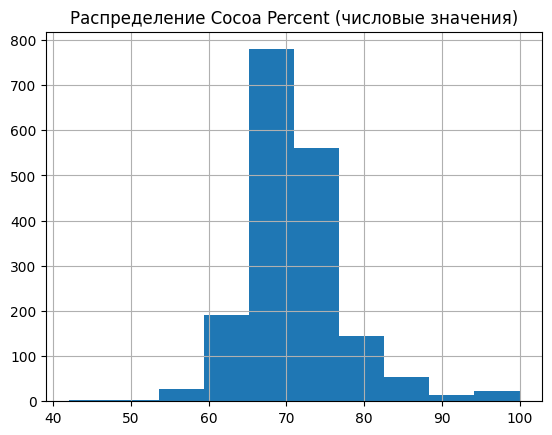


Пропущенных значений нет

=== Анализ столбца: Company Location ===
Тип данных: object
Количество уникальных значений: 60
Примеры значений: ['France' 'U.S.A.' 'Fiji' 'Ecuador' 'Mexico']...

Топ-5 частых значений:
Company Location
U.S.A.    764
France    156
Canada    125
U.K.       96
Italy      63
Name: count, dtype: int64

Пропущенных значений нет

=== Анализ столбца: Rating ===
Тип данных: float64
Уникальные значения:
[3.75 2.75 3.   3.5  4.   3.25 2.5  5.   1.75 1.5  2.25 2.   1.  ]

Распределение значений:
count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64


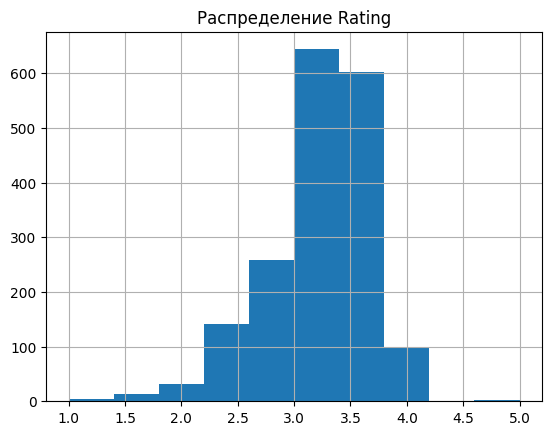


Пропущенных значений нет

=== Анализ столбца: Bean Type ===
Тип данных: object
Количество уникальных значений: 41
Примеры значений: ['\xa0' 'Criollo' 'Trinitario' 'Forastero (Arriba)' 'Forastero']...

Топ-5 частых значений:
Bean Type
                        887
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Name: count, dtype: int64

Пропущенных значений: 1 (0.1%)

=== Анализ столбца: Broad Bean Origin ===
Тип данных: object
Количество уникальных значений: 100
Примеры значений: ['Sao Tome' 'Togo' 'Peru' 'Venezuela' 'Cuba']...

Топ-5 частых значений:
Broad Bean Origin
Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
Name: count, dtype: int64

Пропущенных значений: 1 (0.1%)


In [ ]:
# Анализ каждого столбца
for col in flavors_of_cacao.columns:
    print(f"\n=== Анализ столбца: {col} ===")
    print(f"Тип данных: {flavors_of_cacao[col].dtype}")

    # Для столбцов с небольшим количеством уникальных значений покажем их все
    if flavors_of_cacao[col].nunique() <= 20:
        print(f"Уникальные значения:\n{flavors_of_cacao[col].unique()}")
    else:
        print(f"Количество уникальных значений: {flavors_of_cacao[col].nunique()}")
        print(f"Примеры значений: {flavors_of_cacao[col].unique()[:5]}...")

    # Для числовых столбцов
    if pd.api.types.is_numeric_dtype(flavors_of_cacao[col]):
        print("\nРаспределение значений:")
        print(flavors_of_cacao[col].describe())

        # Гистограмма для визуализации распределения
        flavors_of_cacao[col].hist()
        plt.title(f'Распределение {col}')
        plt.show()
    else:
        # Для категориальных данных
        print("\nТоп-5 частых значений:")
        print(flavors_of_cacao[col].value_counts().head())

        # Для столбцов с процентными значениями преобразуем в числовой формат
        if '%' in str(flavors_of_cacao[col].iloc[0]):
            print("\nАнализ процентных значений:")
            percent_vals = flavors_of_cacao[col].str.replace('%', '').astype(float)
            print(percent_vals.describe())

            percent_vals.hist()
            plt.title(f'Распределение {col} (числовые значения)')
            plt.show()

    # Проверка на пропущенные значения
    missing = flavors_of_cacao[col].isna().sum()
    if missing > 0:
        print(f"\nПропущенных значений: {missing} ({missing/len(flavors_of_cacao):.1%})")
    else:
        print("\nПропущенных значений нет")

In [ ]:
# Группируем по REF и собираем уникальные даты для каждого REF
ref_date_analysis = flavors_of_cacao.groupby('REF')['Review Date'].agg([
    ('unique_dates', 'nunique'),  # Количество уникальных дат
    ('dates_list', lambda x: list(x.unique()))  # Список уникальных дат
]).reset_index()

# Фильтруем только те REF, у которых несколько дат
non_unique_ref_dates = ref_date_analysis[ref_date_analysis['unique_dates'] > 1]

# Сортируем по количеству уникальных дат (по убыванию)
non_unique_ref_dates = non_unique_ref_dates.sort_values('unique_dates', ascending=False)

print(f"Найдено {len(non_unique_ref_dates)} REF с несколькими датами Review Date")
print("\nТоп-10 REF с наибольшим количеством разных дат:")
print(non_unique_ref_dates.head(10))


Найдено 5 REF с несколькими датами Review Date

Топ-10 REF с наибольшим количеством разных дат:
      REF  unique_dates    dates_list
84    464             2  [2009, 2010]
147   793             2  [2011, 2012]
201  1007             2  [2012, 2013]
378  1708             2  [2016, 2015]
433  1928             2  [2016, 2017]


In [ ]:
null_bean_rows = flavors_of_cacao[flavors_of_cacao['Bean Type'] == '\xa0']
print(f"Найдено {len(null_bean_rows)} строк с Bean Type = \\xa0")
print(null_bean_rows)

Найдено 887 строк с Bean Type = \xa0
     Company (Maker) Specific Bean Origin or Bar Name   REF  Review Date  \
0           A. Morin                      Agua Grande  1876         2016   
1           A. Morin                            Kpime  1676         2015   
2           A. Morin                           Atsane  1676         2015   
3           A. Morin                            Akata  1680         2015   
4           A. Morin                           Quilla  1704         2015   
...              ...                              ...   ...          ...   
1787          Zotter                    Santo Domingo   879         2012   
1789          Zotter                    Indianer, Raw   883         2012   
1790          Zotter                             Peru   647         2011   
1793          Zotter                     Kerala State   781         2011   
1794          Zotter               Brazil, Mitzi Blue   486         2010   

     Cocoa Percent Company Location  Rating Bean T

In [ ]:
import pandas as pd

# Создаем DataFrame с проблемными REF (где несколько дат)
problem_refs = flavors_of_cacao.groupby('REF')['Review Date'].nunique()
problem_refs = problem_refs[problem_refs > 1].reset_index()
problem_refs.columns = ['REF', 'unique_dates_count']

# Получаем полную информацию по этим REF
problem_details = pd.merge(
    problem_refs,
    flavors_of_cacao.groupby('REF')['Review Date'].apply(list).reset_index(),
    on='REF'
)

# Добавляем количество записей для каждого REF
problem_details['total_entries'] = problem_details['REF'].map(
    flavors_of_cacao['REF'].value_counts()
)

# Сортируем по количеству уникальных дат и общему числу записей
problem_details = problem_details.sort_values(
    ['unique_dates_count', 'total_entries'],
    ascending=[False, False]
)

# Выводим результаты
print(f"Всего проблемных REF: {len(problem_details)}")
print("\nТоп-10 REF с наибольшим количеством разных дат:")
print(problem_details.head(10))

# Функция для вывода подробной информации по конкретному REF
def show_ref_details(ref):
    print(f"\nПодробная информация для REF {ref}:")
    ref_data = flavors_of_cacao[flavors_of_cacao['REF'] == ref]
    print(ref_data.sort_values('Review Date'))



Всего проблемных REF: 5

Топ-10 REF с наибольшим количеством разных дат:
    REF  unique_dates_count               Review Date  total_entries
0   464                   2  [2009, 2009, 2010, 2010]              4
1   793                   2  [2011, 2012, 2012, 2012]              4
2  1007                   2  [2012, 2012, 2012, 2013]              4
3  1708                   2  [2016, 2015, 2015, 2015]              4
4  1928                   2  [2016, 2016, 2016, 2017]              4


In [ ]:
import pandas as pd

# Группируем по REF и собираем все уникальные Review Date
ref_review_dates = flavors_of_cacao.groupby('REF')['Review Date'].unique().reset_index()

# Переименовываем колонку для ясности
ref_review_dates.columns = ['REF', 'Unique Review Dates']

# Сортируем по REF (по возрастанию)
ref_review_dates = ref_review_dates.sort_values('REF')

# Выводим результаты
print("Все уникальные значения Review Date для каждого REF:")
print(ref_review_dates.to_string(index=False))
print(ref_review_dates.count())
print(ref_review_dates.count())

Все уникальные значения Review Date для каждого REF:
 REF Unique Review Dates
   5              [2006]
  15              [2006]
  24              [2006]
  32              [2006]
  40              [2006]
  48              [2006]
  56              [2006]
  63              [2006]
  75              [2006]
  81              [2006]
  87              [2006]
  93              [2006]
  99              [2006]
 105              [2006]
 111              [2007]
 117              [2007]
 123              [2007]
 129              [2007]
 135              [2007]
 141              [2007]
 147              [2007]
 153              [2007]
 157              [2007]
 162              [2007]
 166              [2007]
 170              [2007]
 175              [2007]
 180              [2007]
 184              [2007]
 188              [2007]
 192              [2007]
 196              [2007]
 199              [2008]
 202              [2008]
 206              [2008]
 209              [2008]
 213              [200

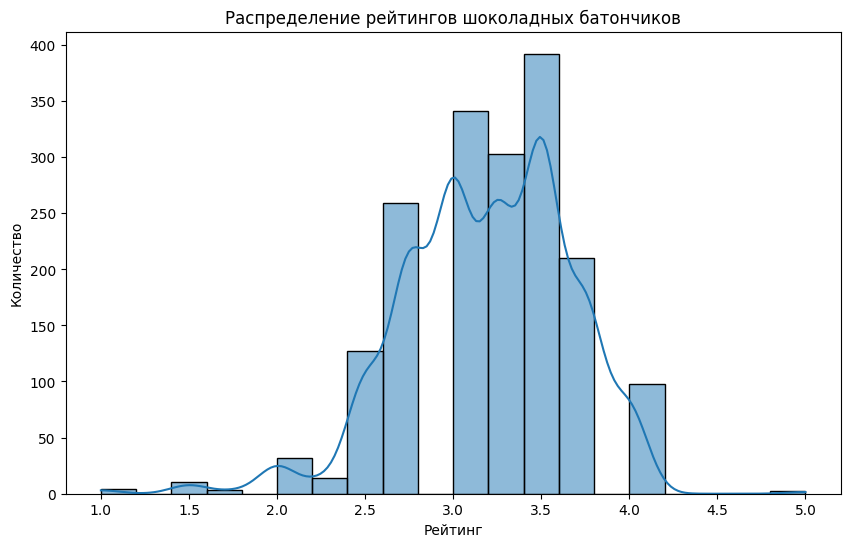

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(flavors_of_cacao['Rating'], bins=20, kde=True)
plt.title('Распределение рейтингов шоколадных батончиков')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

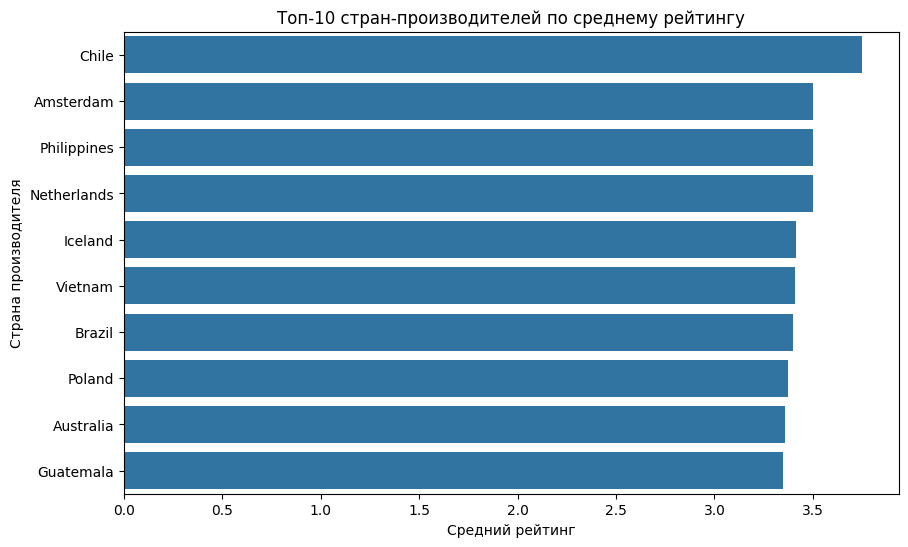

In [ ]:
top_countries = flavors_of_cacao.groupby('Company Location')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Топ-10 стран-производителей по среднему рейтингу')
plt.xlabel('Средний рейтинг')
plt.ylabel('Страна производителя')
plt.show()

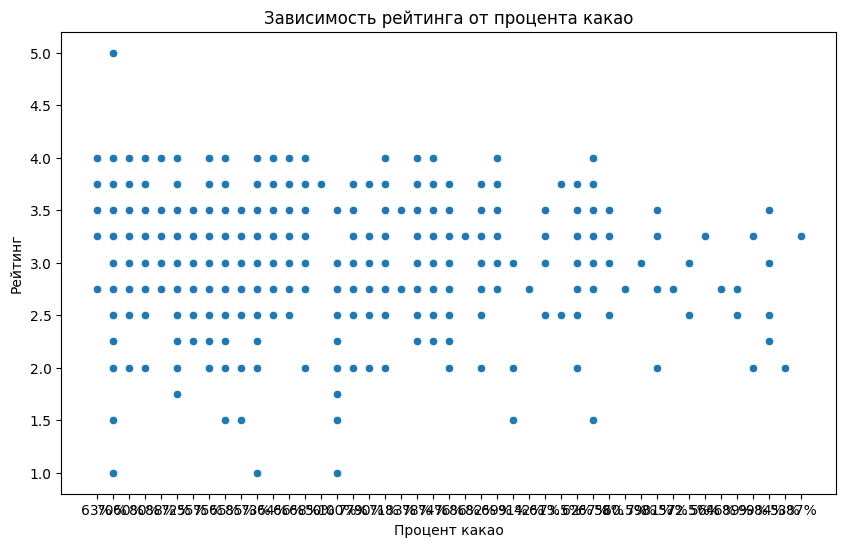

In [ ]:
# Зависимость рейтинга от процента какао
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cocoa Percent', y='Rating', data=flavors_of_cacao)
plt.title('Зависимость рейтинга от процента какао')
plt.xlabel('Процент какао')
plt.ylabel('Рейтинг')
plt.show()

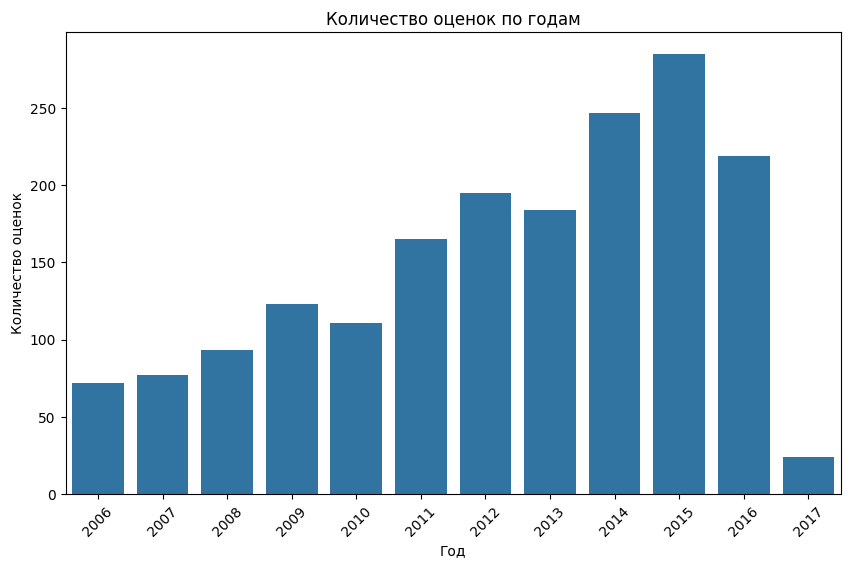

In [ ]:
# Количество оценок по годам
plt.figure(figsize=(10, 6))
sns.countplot(x='Review Date', data=flavors_of_cacao)
plt.title('Количество оценок по годам')
plt.xlabel('Год')
plt.ylabel('Количество оценок')
plt.xticks(rotation=45)
plt.show()

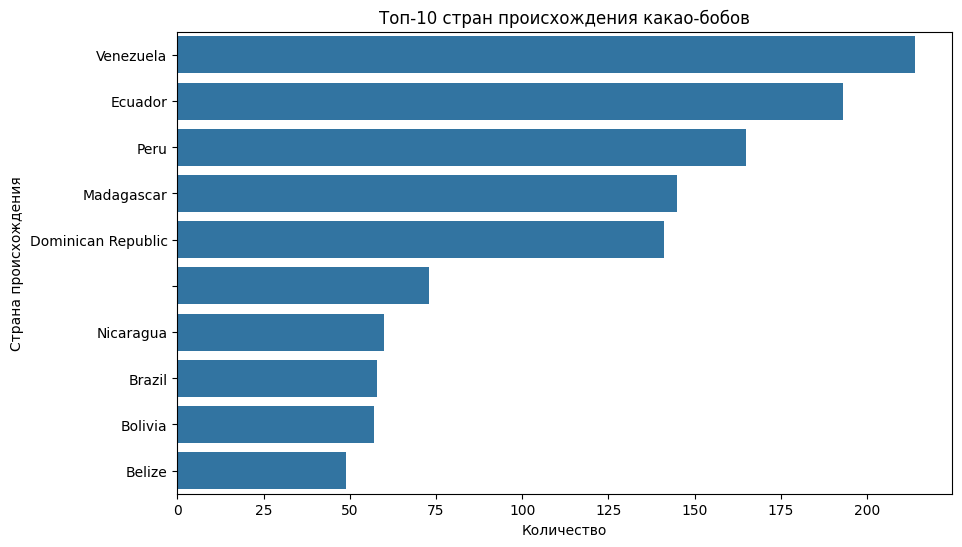

In [ ]:
# Анализ происхождения какао-бобов
top_origins = flavors_of_cacao['Broad Bean Origin'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_origins.values, y=top_origins.index)
plt.title('Топ-10 стран происхождения какао-бобов')
plt.xlabel('Количество')
plt.ylabel('Страна происхождения')
plt.show()